In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

## (1) Boltzmann Equation

Using the information given in the book by LeBlanc, calculate the ratio $n_2/n_1$ of populations of the first excited versus ground level of H for the following temperatures:

- 3000 K
- 5000 K
- 8000 K
- 10000 K

Recall the Boltzmann Equation,

$$\frac{n_2}{n_1} = \frac{g_2}{g_1} \exp\left(-\frac{E_2-E_1}{kT}\right)$$

In [2]:
def En(n):
    return 13.6* u.eV * (1 - 1/n**2)

def n2_n1(n1, n2, T):
    g2 = 2*n2**2
    g1 = 2*n1**2
    E2 = En(n2)
    E1 = En(n1)
    
    return (g2/g1)*np.exp(-(E2-E1)/(const.k_B * T))

In [3]:
for T in [3000, 5000, 8000, 10000]:
    print(f'n2/n1 (T = {T} [K]) = ', n2_n1(n1=1, n2=2, T=T * u.K))

n2/n1 (T = 3000 [K]) =  2.929600122214504e-17
n2/n1 (T = 5000 [K]) =  2.0936737286961372e-10
n2/n1 (T = 8000 [K]) =  1.5008615232598242e-06
n2/n1 (T = 10000 [K]) =  2.893906514520562e-05


___
## (2) Saha Equation (skipped)

Assume a star made of pure H. At some point near the photosphere, the mass density is $\rho= 3.5 \times 10^{-7} [g cm^{-3}]$. Calculate the number density $n_H$ of H atoms, assuming that most of the H is neutral. Using the Saha equation, calculate the number of protons in the gas at the following temperatures:

- 3000 K
- 5000 K
- 8000 K

Recall the Saha equation,

$$\frac{n_{i+1}}{n_{i}} = \frac{1}{n_e} \left(\frac{2\pi m_ekT}{h^2}\right)^{3/2}\frac{2U_{i+1}}{U_i} \exp\left(\frac{-E_{ion}}{kT}\right)$$

where,

$$U_i = \sum_{n=1}^{nmax} g_n \exp(-E_n / kT)$$

In [4]:
def n_max(rho):
    return (2*const.a0)**(-1/2)*(rho)**(-1/6)

In [5]:
def partition(T, rho, nmax):
    
    ns = np.arange(1, nmax)

    U = (2.0*ns**2)*np.exp(-En(ns)/(const.k_B * T))
        
    return U

In [6]:
rho = (3.5e-7)*u.g*(u.cm)**(-3)
nmax = np.ceil(n_max(rho).value).astype(int)

In [7]:
for T in [3000, 5000, 8000]:
    print(partition(T*u.K, rho, nmax))

[2.00000000e+00 5.85920024e-17 8.84761283e-20 ... 3.81392509e-11
 3.81393168e-11 3.81393827e-11]
[2.00000000e+00 4.18734746e-10 1.17545137e-11 ... 5.25016602e-02
 5.25017509e-02 5.25018416e-02]
[2.00000000e+00 3.00172305e-06 4.36119100e-07 ... 7.25685643e+03
 7.25686896e+03 7.25688150e+03]


___
## (3) Working with Stellar Spectrum

File 1753905in.s is the wavelength-calibrated spectrum of a star, obtained with the high-resolution echelle spectrograph Espadons, which is a benchmounted instrument, fiber-fed from a Cassegrain unit at the Canada-FranceHawaii Telescope (CFHT) on Maunakea, Hawaii. The spectral resolution of this spectrograph is $R = \lambda/\Delta\lambda = 68000$

In [8]:
import pandas as pd
import numpy as np
import astropy.units as u

temp = np.genfromtxt("1753905in.s")
df = pd.DataFrame(temp)

df.columns = [f'col_{i}' for i in range(7)]

df.col_0 = (df.col_0 * u.nm).values.to('AA')

df.sort_values(by=['col_0'], inplace=True)
df.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,3698.862,0.34607,0.022133,-0.017995,0.20457,0.017536,0.015871
101066,3698.862,0.34607,0.022133,-0.017995,0.20457,0.017536,0.015871
1,3698.885,0.46290,0.042772,-0.008579,0.17882,0.015596,0.013454
101067,3698.885,0.46290,0.042772,-0.008579,0.17882,0.015596,0.013454
2,3698.908,0.42755,0.036014,-0.012032,0.18526,0.015008,0.015618
101068,3698.908,0.42755,0.036014,-0.012032,0.18526,0.015008,0.015618
3,3698.931,-0.19127,0.019585,0.047379,0.20943,0.017839,0.016422
101069,3698.931,-0.19127,0.019585,0.047379,0.20943,0.017839,0.016422
101070,3698.954,0.42405,0.028423,-0.020517,0.18654,0.016349,0.013906
4,3698.954,0.42405,0.028423,-0.020517,0.18654,0.016349,0.013906


___
### (3.1) Plotting Spectrum

Write a computer program that will read all the data and plot the spectrum
between 4200 and 6700 Angstroms. What are the strongest absorptions?
Can you identify them?

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0.5,0,'Wavelength [Angstrom]')

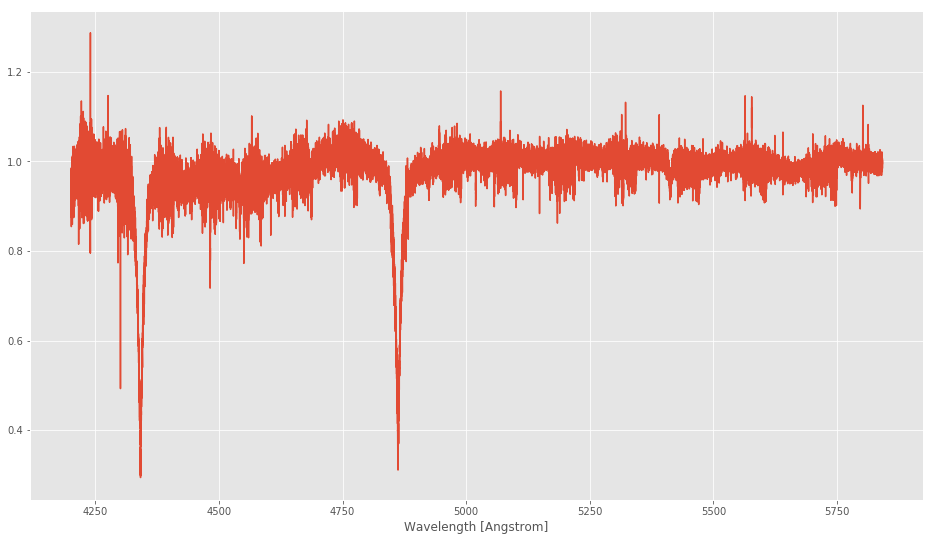

In [10]:
fig = plt.figure(figsize=(16,9))
trim_df = df[(df.col_0 > 4200 * u.AA) & (df.col_0 < 6700 * u.AA)]
plt.plot(trim_df.col_0, trim_df.col_1)

plt.xlabel('Wavelength [Angstrom]')

### (3.2) Selected Spectral Lines
Adapt your program so that you can plot the following features:
- \[Mg II\] 4481.228
- \[Fe II\] 4508.27
- \[N V\] 4603.73
- \[O V\] 5114.07
- \[C IV\] 5801.33
- \[C IV\] 5811.98

The wavelength range for each plot should be 4 Angstroms.

In [11]:
spec_lines = {
        'MGII' : 4481.228 * u.AA, 
        'FeII' : 4508.27 * u.AA, 
        'NV' : 4603.73 * u.AA, 
        'OV' : 5114.07 * u.AA, 
        'CIV' : 5801.33 * u.AA, 
        'CIV2' : 5811.98 * u.AA
    }

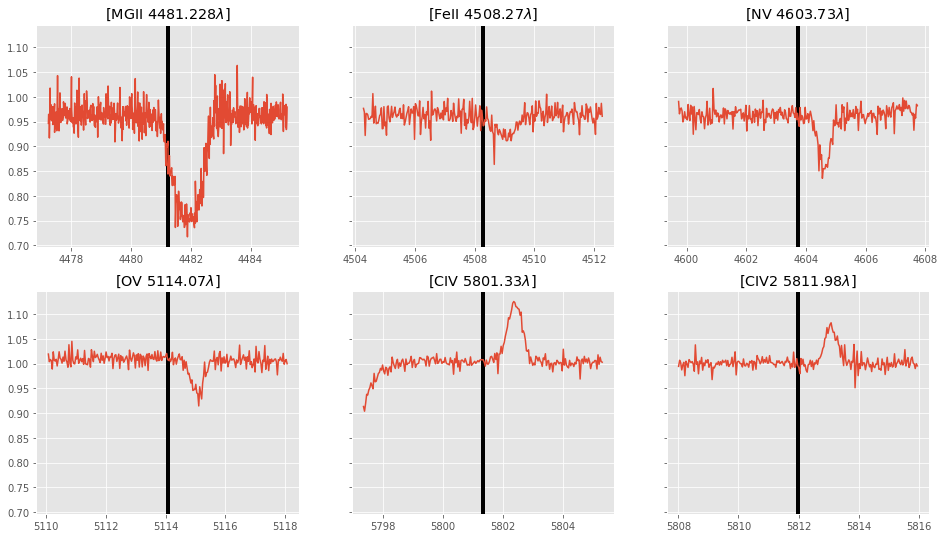

In [12]:
fig, axarr = plt.subplots(2, 3, figsize=(16,9), sharey=True)
window = 4 * u.AA

locs = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

for idx, element in enumerate(spec_lines):

    temp_df = df[(df.col_0 > (spec_lines[element] - window)) & (df.col_0 < (spec_lines[element] + window))]
    
    axarr[locs[idx]].axvline(spec_lines[element].value, color='k', lw=4)
    axarr[locs[idx]].plot(temp_df.col_0, temp_df.col_1)
    
    axarr[locs[idx]].set_title(f'[{element} {spec_lines[element].value}$\lambda$]')

plt.show()

___
### (3.3) Instrumental Profile

Select the Mg II absorption. Overplot a Gaussian, with a full width at half-maximum (FWHM) equal to $\lambda/R$. Do you think there are other sources of broadening in addition to the instrumental broadening? What would you expect the most probable sources of extra broadening to be?

Recall a Gaussian has the functional form,

$$f(x) = A\exp\left(-\frac{1}{2} \left(\frac{(x-\mu)}{\sigma}^2\right)\right)$$

which can be rexpressed in terms of the FWHM,

$$f(x) = A\exp\left(- \frac{4\ln(2)(x-\mu)^2}{\text{FWHM}^2}\right)$$

In [13]:
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, FWHM, y = p
    return (A)*np.exp(-(4.*np.log(2)*(x-mu)**2) / FWHM**2) + y

def gauss_str(*p, prec=2):
    A, mu, FWHM, y = p
    
    return f'$f(x)=${A.round(prec)}$exp(-4ln(2)(x - ${mu.round(prec)}$)^2/ ${FWHM.round(prec)}$^2) + ${y.round(prec)}'

def titles(*p):
    global spec_lines_ars
    
    elem, mu, FWHM = p
    
    center = spec_lines_pars[elem]['center']
    
    return f'[{elem} {center.value}$\lambda$] : $\mu = ${mu.round(2)}, $FWHM = ${FWHM.round(2)}'

In [14]:
spec_lines_pars = {
        'MGII' : {"center" : 4481.228 * u.AA, "amp" : -0.3}, 
        'FeII' : {"center" : 4508.27 * u.AA, "amp" : -0.05}, 
        'NV' : {"center" : 4603.73 * u.AA, "amp" : -0.25}, 
        'OV' : {"center" : 5114.07 * u.AA, "amp" : -0.75}, 
        'CIV' : {"center" : 5801.33 * u.AA, "amp" : 0.1}, 
        'CIV2' : {"center" : 5811.98 * u.AA, "amp" : 0.1}
    }

/Users/kaimibk/miniconda3/envs/UHenv/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


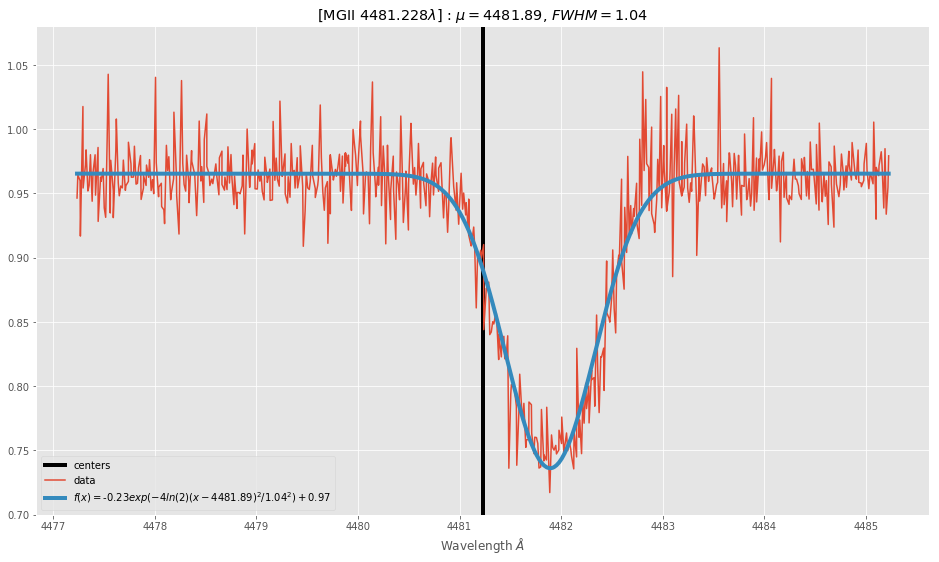

In [15]:
fig = plt.figure(figsize=(16,9))
window = 4 * u.AA

temp_df = df[(df.col_0 > (spec_lines_pars['MGII']['center'] - window)) & (df.col_0 < (spec_lines_pars['MGII']['center'] + window))]

temp_df.sort_values(by=['col_0'], inplace=True)

plt.axvline(spec_lines_pars['MGII']['center'].value, color='k', lw=4, label='centers')
plt.plot(temp_df.col_0, temp_df.col_1, label='data')

p0 = [-0.3, (spec_lines_pars['MGII']["center"]).value, spec_lines_pars['MGII']["center"].value/68000, 1.0]

popt, pcov = curve_fit(gauss, temp_df.col_0, temp_df.col_1, p0=p0, maxfev=10000)

hist_fit = gauss(temp_df.col_0, *popt)

plt.plot(temp_df.col_0, hist_fit, label=gauss_str(*popt), lw=4)

plt.title(titles("MGII", popt[1], popt[2]))
plt.xlabel(r'Wavelength $\AA$')

plt.legend()
plt.show()

#### Repeating Process for All Spectral Lines

/Users/kaimibk/miniconda3/envs/UHenv/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


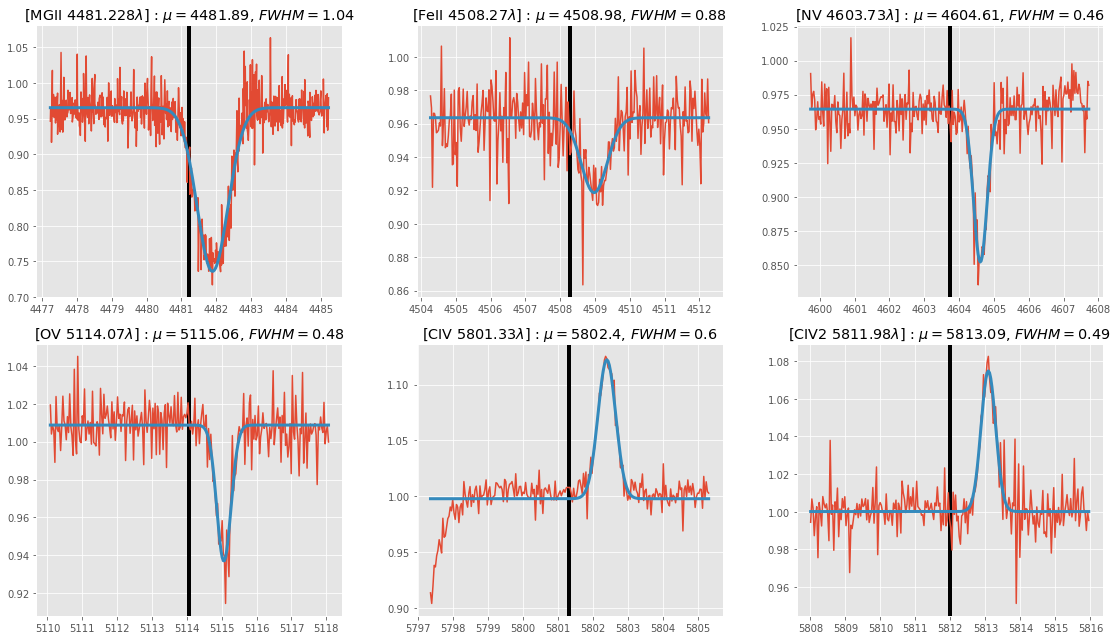

In [16]:
fig, axarr = plt.subplots(2, 3, figsize=(16,9))
window = 4 * u.AA

locs = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

for idx, element in enumerate(spec_lines_pars):

    temp_df = df[(df.col_0 > (spec_lines_pars[element]['center'] - window)) & (df.col_0 < (spec_lines_pars[element]['center'] + window))]
    temp_df.sort_values(by=['col_0'], inplace=True)
    
    axarr[locs[idx]].axvline(spec_lines_pars[element]['center'].value, color='k', lw=4)
    axarr[locs[idx]].plot(temp_df.col_0, temp_df.col_1)
    
    
    p0 = [spec_lines_pars[element]["amp"], (spec_lines_pars[element]["center"]).value+1.0, 1.0, 1.0]

    popt, pcov = curve_fit(gauss, temp_df.col_0, temp_df.col_1, p0=p0, maxfev=10000)

    hist_fit = gauss(temp_df.col_0, *popt)

    axarr[locs[idx]].plot(temp_df.col_0, hist_fit, lw=3)   
    axarr[locs[idx]].set_title(titles(element, popt[1], popt[2]))
    
    spec_lines_pars[element]['mu'] = popt[1]
    spec_lines_pars[element]['FWHM'] = popt[2]


plt.tight_layout()

plt.savefig('gauss_fit.png', dpi=300, bbox_inches='tight')
plt.show()

___
### (3.4) Measure Radial Velocities

Measure the center wavelength of each spectral feature and calculate the corresponding heliocentric radial velocities in \[km/s\], using $V = c\Delta\lambda/\lambda$. Describe your results and offer an interpretation.

In [17]:
for idx, element in enumerate(spec_lines_pars.keys()):
    FWHM = spec_lines_pars[element]['FWHM'] * u.AA
    mu = spec_lines_pars[element]['mu'] * u.AA
    
    print(element)
    print('\t', (const.c * FWHM / mu).round(2).to('km/s'))

MGII
	 69.66461 km / s
FeII
	 58.49015 km / s
NV
	 29.9719 km / s
OV
	 28.19893 km / s
CIV
	 30.88193 km / s
CIV2
	 25.34993 km / s
